<a href="https://colab.research.google.com/github/pujangrg1/Info_5082/blob/main/FinalProject_PujanGurung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stock’s Direction Prediction Through Sentiment Analysis Of Twitter Data**



> **INFO 5082**

>**Fall 2021**

>**Pujan Gurung**

# Introduction
Twitter analytics may reveal real-time information on how people are talking about a firm. It might provide as a glimpse into the company's internet reputation. If the tweets about a firm are thoroughly evaluated, it may provide important information such as if there is widespread happiness or dissatisfaction with the organization. Taking into account postings made on social media is highly significant in today's world, because individuals continually engage on social media, which reflects their beliefs.

For this study, I used real-time data about the firm acquired on Twitter and then ran a sentiment analysis on the data. Finally, I tried to see if there was any link between them in order to see if we could predict the direction of the stock using twitter sentiment analysis.

# Statement of Problem
As briefly explained above, the accumulation of more positive than negative statements about a firm in real time might imply that the stock of the company would trend positive during and after the period in which the remarks are examined. Similarly, a higher number of negative comments than positive comments might suggest that the company's stock is heading in the wrong direction during or shortly after the statements were made. This might give an extra tool for an ordinary stock trader to make a decision before engaging in short-term stock transactions such as day trading and swing trading.

In a nutshell, the purpose of this study is to see whether we can uncover a link between a company's Twitter data sentiment and its stock price right now. This project contains extensive work that covers the majority of the phases of the data life cycle, including data gathering, exploratory data analysis, data modeling and management, data analysis, data visualization, reporting, and data analysis findings interpretation. Many questions can be answered when this dataset has been analyzed.

# Review of Literation: Research Publications
1.   Twitter Sentiment Analysis:The Good the Bad and the OMG! : The authors look on the effectiveness of linguistic elements in identifying sentiment in Twitter posts. The utility of current lexical resources, as well as characteristics that capture information about microblogging's informal and creative language, were assessed. The authors use a supervised method to the problem, however they construct training data using existing hashtags from Twitter data. Part-of-speech traits may not be beneficial for sentiment analysis in the microblogging arena, according to research on twitter sentiment analysis. Microblogging characteristics (i.e., the existence of intensifiers and positive/negative/neutral emoticons and abbreviations) were definitely the most beneficial when combined with elements from an existing emotion lexicon. Using hashtags to collect training data, as well as data based on positive and negative emoticons, proved to be beneficial. However, the type of features utilized may influence whether technique gives better training data and if the two sources of training data are complimentary. Experiments have shown that using microblogging characteristics reduces the usefulness of emoticon training data.
2.   A Study on Sentiment Analysis Techniques of Twitter Data : Various methodologies for Twitter sentiment analysis methods, such as machine learning, ensemble approaches, and dictionary (lexicon) based approaches, were explored in the article. Hybrid and ensemble Twitter sentiment analysis algorithms were also investigated. Machine learning algorithms such as the SVM and MNB, for example, generated the highest precision, especially when many characteristics were added, according to the findings. SVMclassifiers can be seen of as typical learning procedures, although dictionary (lexicon)-based approaches can be quite useful in the human-marked archive and require little work. When the n-gram and bigram models were used, machine learning techniques such as The Naive Bayes, Maximum Entropy, and SVM obtained an accuracy of around 80%. Ensemble and hybrid-based Twitter sentiment analysis algorithms outperformed supervised machine learning approaches, with classification accuracy of around 85%. Ensemble Twitter sentiment-analysis approaches, which include numerous classifiers and occasionally diverse feature models, were projected to outperform supervised machine learning algorithms in general. However, because hybrid techniques were able to use both machine learning classifiers and lexicon-based Twitter sentiment-analysis algorithms, they performed effectively and achieved respectable classification accuracy ratings. 

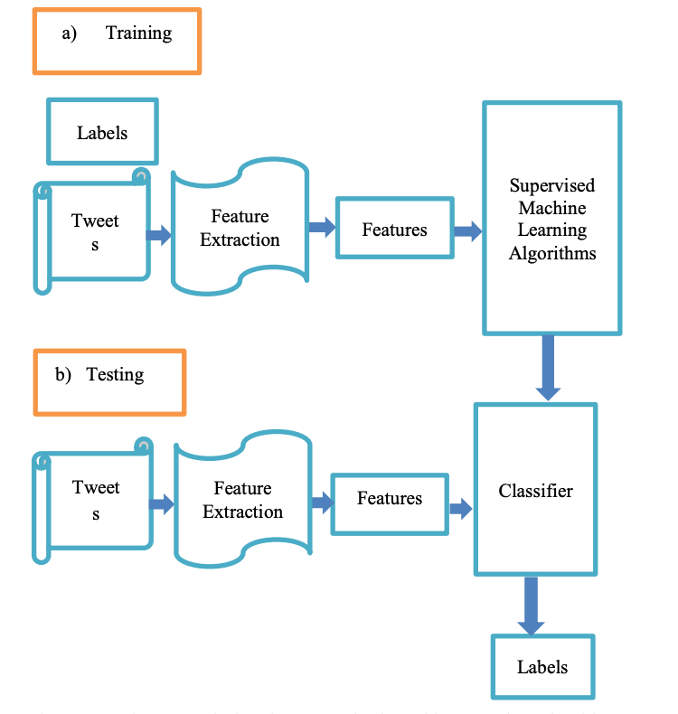

Fig 1: Sentiment Analysis using Supervised Machine Learning Algorithm [2]

# Objective of the study
The study's main goals are to apply what they've learned in the Data Science program to a real-world situation and obtain practical experience. The Research Seminar program is a semester-long course in which students may investigate and practice data science-related work by working with real-world data to find solutions to questions that can be used in the workplace. Another quantifiable goal of the study and seminar course is to give the project's final report. The purpose of this project is to be able to do sentiment analysis on Twitter data relating to a business name and its stock symbol and analyze the results. Another goal is to examine whether there is any association between the sentiment results and the actual stock price for the time period. Above and above completing all of the Final Report's standards, the final report will provide the best logical responses to the concerns and questions that have been presented.

# Hypothesis of the study
The study's research hypothesis is that analyzing sentiment data from Twitter for a firm and its stock symbol may be able to forecast the direction of the stock price in the short term.
By comparing the sentiment analysis to the actual stock price, we hope to demonstrate this.

# Research Design and Methodology
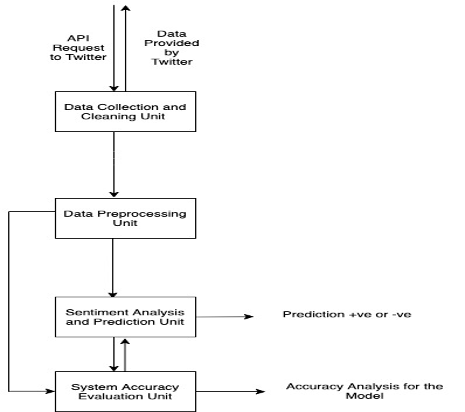

# Importing Libraries


In [ ]:
pip install twitter


     |████████████████████████████████| 50 kB 1.8 MB/s 


In [ ]:
pip install emoji 

     |████████████████████████████████| 170 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=bca1124ff3ea3a129f6f6027b416bf9abf94aeaf74ac1108e0df32f14fad04f3
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
#Data Collection

import twitter
from twitter import *
import tweepy
from tweepy import *
import json

#Data Preprocessing
import nltk
nltk.download('all')
nltk.download('stopwords')
nltk.download('punkt')

import re
import os
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
from nltk.probability import FreqDist

#Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#Visualization
import matplotlib.pyplot as plt


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Data preparation

**Fetch the data with API** : 
A python code has been written to gather 75 tweets for the company name and 75 tweets for the company symbol. The method takes use of the Tweepy package, which performs API calls to Twitter to collect data. If we want to gather more than 150 tweets at once, we may use the function numerous times. The method provides a list of tweets to be used by the next unit, as well as a file containing all of the tweets.

In [ ]:
#Collecting data

print('For the following questions regarding company: do not leave blank and ensure correct spelling')
comp_symbol = input("Please type in the company's symbol you wish to analyze: ")
comp_name = input("Please type in the company's name you wish to analyze: ")

def data_collect(comp_symbol=comp_symbol, comp_name=comp_name):
  token = '1216576055663898626-n5yf1bfQ4gdlbP7qTiONlUyouMt9Bi'
  tok_sec = 'IGEer8FdeCZWHCJs7TXsWHMx6x0JdqamdibcqAl5jpS0v'
  consumer = 'otxEsBa08dackAAAtGuAFH2Lx'
  cons_sec = 'vNmuxgxbIQyPZAk1vJijhxJ4mjXdgKuRwyw91c6mPHfhpk5qLm'
  # create and store tweets in a list
  ## create empty list / two lists for now for two seperate searches

  auth = tweepy.OAuthHandler(consumer, cons_sec)
  ## Access keys
  auth.set_access_token(token, tok_sec)
  ## api authorization
  api = tweepy.API(auth, wait_on_rate_limit=True)

  symbol_listT = []
  symbol_listI = []
  company_listT = []
  company_listI = [] 

  ## for loop to iterate and append 150 tweets to a list
  ## can alter later and add a parameter to narrow down searh such as retweeted=False
  ### tweepy.Cursor is all tweets = search
  ### Keep parameters: lang='en

  for tweet in tweepy.Cursor(api.search, q='#' + comp_symbol, lang='en').items(150):
    #### append to list if not retweet or @ RT
    if not tweet.retweeted and 'RT @' not in tweet.text:
      txt_symbol = tweet.text
      id_symbol = tweet.id
      symbol_listT.append(txt_symbol)
      symbol_listI.append(id_symbol)
  for tweet in tweepy.Cursor(api.search, q='#' + comp_name, lang='en').items(150):
    if not tweet.retweeted and 'RT @' not in tweet.text:
      txt_name = tweet.text
      id_name = tweet.id
      company_listT.append(txt_name)
      company_listI.append(id_name)

  with open('TweetID.txt', 'w') as id:
    ### append tweet ids
    for status in company_listI:
      #print(status)
      print(status, file=id)
    for status in symbol_listI:
      #print(status)
      print(status, file=id)

  with open('TweetTxt.txt', 'w') as txt:
    ### append tweet ids
    for status in company_listT:
      #print(status)
      print(status, file=txt)
      print("_____________________________", file=txt)
    for status in symbol_listT:
      #print(status)
      print(status, file=txt)
      print("_____________________________", file=txt)

  print('A new txt file was made for the user IDs of the tweets analyzed as well as a txt file containing all the tweets that remain after filtering.')
  
  # for item in company_listT or symbol_listT:
  #   new_list = []
  #   new_list.append(item)

  # return new_list
  return company_listT, symbol_listT

data_name, data_symbol = data_collect()

For the following questions regarding company: do not leave blank and ensure correct spelling
Please type in the company's symbol you wish to analyze: LCID
Please type in the company's name you wish to analyze: lucid
A new txt file was made for the user IDs of the tweets analyzed as well as a txt file containing all the tweets that remain after filtering.


In [ ]:
print(data_name)


print(data_symbol)


['#NASDAQ Volume Leaders\n#Petros Pharmaceuticals ( $PTPI) Buy\n#Biofrontera Inc ( $BFRI) -\n#Apple Inc ( $AAPL) -… https://t.co/V3vpgbT9UO', 'I have a good friend that lives less then 5 miles from #Lucid in Casa Grande, Az., so we decided to drive over ther… https://t.co/sHqjX715jA', 'Shit hit rate mate 🤦\n\nFun random fact of my #everydays \nOf 333 pieces, my old man has only liked one single piece.… https://t.co/GY1DYWbZ10', '21 Bwanas by Backman\n\nAll 1/1\n0.02 eth \n6/21 left!\n\n#NFT #NFTCommunity #digitalart #trippy #lucid #psychedelic… https://t.co/dtSURz2fix', "Who's waiting for a dip 😂\n$LCID #LCID #Lucid https://t.co/KkpZV9HXwU", "Nothing to see here. Just #Lucid close @55$ 🙌🏽  now I definitely see 60$ in December.  Let's gooooo...... \n$LCID… https://t.co/0dIyupyDdK", '#Lucid is not just another EV. Lucid will reclaim luxury brand of American made automobile.', '$LCID 55 test. Great volume. Excited for this week 👀\n\n#Tesla #lucid #LucidAir #stocks #investing', '🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸

# Analyzing tweets prior to preprocessing


In [ ]:
#Update this portion so that it accepts the file instead of the list
def statisticInfo(i):
  #Number of words
  print("Number of words:", len(i))

  #Lexical Diversity
  print("lexical_diversity:", len(set(i)) / len(i))

  #Frequency Distribution of different words
  fdist = FreqDist(i)
  print(fdist)

  # #20 most common words
  return fdist.most_common(20)

# Pre-processing

Our purpose in this stage is to process data that may be used in sentiment analysis, therefore words are the most significant component. We import Python's Regular Expression (RegEx) module after acquiring the data in list format, which is highly useful for parsing strings and effectively changing them without having to directly loop over the characters that make up the text. We have added the Natural Processing Toolkit (ntlk), which is one of the most widely used Python packages. It handles whatever text processing we need to do to modify its shape or extract certain components from it.

Steps: 

*   First, we lower-case all of our characters throughout all of our data.
*   The URLs and usernames in the tweet are then erased.
*   To avoid hashtags being handled differently, the number sign (i.e. #) is deleted from each hashtag.
*   Duplicate letters are then removed to guarantee that no important words are missed, even if they are spelt in an odd fashion (for example, "caaaat" becomes "cat").
*   Finally, delete all of the emojis.
*   Finally, the text of the tweet is split down into terms (tokenized) to make it easier to analyze in the next phases.

In [ ]:
class PreProcessTweets:
    def __init__(self):
        self._stopwords = set(stopwords.words('english') + list(punctuation) + ['ATUSER','URL','rt'])
        
    def processTweets(self, list_of_tweets):
        processedTweets=[]
        # print(list_of_tweets[1])
        for tweet in list_of_tweets:
          print(self._processTweet(tweet))
          processedTweets.append((self._processTweet(tweet)))
          # print(processedTweets)
        return processedTweets

    def _processTweet(self, tweet):
        tweet = tweet.lower() # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
        emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002500-\U00002BEF"  # chinese char
                u"\U00002702-\U000027B0"
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u"\U00010000-\U0010ffff"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u200d"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\ufe0f"  # dingbats
                u"\u3030"
                "]+", flags=re.UNICODE)

        tweet = emoji_pattern.sub(r'', tweet) # remove emojis
        tweet = re.sub(r"\d", "", tweet) # remove digits
        punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~¢…₹’'''
        tweet = ''.join([i for i in tweet if not i in punctuations]) # remove all the symbols
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        return [word for word in tweet if word not in self._stopwords]


In [ ]:
## read text file
def readTxt(t):
  text = open(t, "r")
  # print(text.read())
  return text

## create an object to call the class
tweetProcessor = PreProcessTweets()
cleaned_tweet = tweetProcessor.processTweets(readTxt("TweetTxt.txt"))

## join all the tokens
tweetlist = []
for i in cleaned_tweet:
  tweet = ' '.join(i)
  tweetlist.append(tweet)
print("________________________________________")  
print(tweetlist)

## save tweetlist to a file "CleanedTweetTxt.txt"
with open('CleanedTweetTxt.txt', 'w') as f:
  for item in tweetlist:
    f.write("%s\n" % item)
  f.close()


['nasdaq', 'volume', 'leaders']
['petros', 'pharmaceuticals', 'ptpi', 'buy']
['biofrontera', 'inc', 'bfri']
['apple', 'inc', 'aapl']
[]
['good', 'friend', 'lives', 'less', 'miles', 'lucid', 'casa', 'grande', 'az', 'decided', 'drive', 'ther']
[]
['shit', 'hit', 'rate', 'mate']
[]
['fun', 'random', 'fact', 'everydays']
['pieces', 'old', 'man', 'liked', 'one', 'single', 'piece']
[]
['bwanas', 'backman']
[]
[]
['eth']
['left']
[]
['nft', 'nftcommunity', 'digitalart', 'trippy', 'lucid', 'psychedelic']
[]
['whos', 'waiting', 'dip']
['lcid', 'lcid', 'lucid']
[]
['nothing', 'see', 'lucid', 'close', 'definitely', 'see', 'december', 'lets', 'gooooo']
['lcid']
[]
['lucid', 'another', 'ev', 'lucid', 'reclaim', 'luxury', 'brand', 'american', 'made', 'automobile']
[]
['lcid', 'test', 'great', 'volume', 'excited', 'week']
[]
['tesla', 'lucid', 'lucidair', 'stocks', 'investing']
[]
['nasdaq', 'gttsla', 'aapl', 'rivian', 'lucid', 'gme', 'united', 'states', 'speculation']
[]
[]
['lcid', 'bull', 'flag', 

# Statistical Analysis of the the Processed  File

Because we're working with text, the exploratory data analysis is counting the number of words in the text, calculating the lexical diversity of the words (the ratio of unique words to all words), and displaying the most common terms. The result shown below depicts the function's output in real time during execution for Lucid (Stock symbol LCID).

In [ ]:
# Analyze the text file
statisticInfo(tweetlist)

Number of words: 497
lexical_diversity: 0.4225352112676056
<FreqDist with 210 samples and 497 outcomes>


[('', 236),
 ('lcid', 17),
 ('nft nftcommunity digitalart trippy lucid psychedelic', 5),
 ('lucid', 4),
 ('lcid call', 4),
 ('bwanas backman', 3),
 ('eth', 3),
 ('left', 3),
 ('dream journal dream diary', 3),
 ('lcid lcid', 3),
 ('lotto', 3),
 ('optionsproalert', 3),
 ('whos waiting dip', 2),
 ('lcid lcid lucid', 2),
 ('nothing see lucid close definitely see december lets gooooo', 2),
 ('tesla', 2),
 ('whos ready power hour', 2),
 ('get free share lucid deposit moo moo', 2),
 ('lcid lucidownersclub lucid lucidmotors lucidlq lucidlands lucids usa nyse nasdaq stock newyork',
  2),
 ('made video lucid technology race year since last created youtube video', 2)]

# Sentiment Analysis

In [ ]:
def sentimentCount(preprocessedText):
  neg = 0
  pos = 0
  neu = 0
  analyzer = SentimentIntensityAnalyzer()
  for i in preprocessedText:
    sentiments = analyzer.polarity_scores(i)
    print(sentiments)
    if sentiments.get('compound') < 0:
      neg = neg + 1
    elif sentiments.get('compound') > 0:
      pos = pos + 1
    elif sentiments.get('compound') == 0:
      neu = neu + 1
  results = {'neg': neg, 'pos': pos, 'neu': neu}
  print("\n")  
  return results
  

In [ ]:
def sentimentOfStock(resultDict):
  print('\n')
  if max(resultDict) == 'neg':
    print("Sentiment for the stock is negative")
  elif max(resultDict) == 'pos':
    print('Sentiment for the stock is positive')
  elif max(resultDict) == 'neu':
    print('Sentiment for the stock is neutral')
  else:
    print('Sentiment for the stock is ambiguous')
  print('\n')
  print('Here is the count for negative, positive and neutral tweets: \n', resultDict)
  


In [ ]:
#Printing out results
results = sentimentCount(tweetlist)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'compound': 0.7269}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sentimentOfStock(results)



Sentiment for the stock is positive


Here is the count for negative, positive and neutral tweets: 
 {'neg': 18, 'pos': 78, 'neu': 401}


VADER (Valence Aware Dictionary for Sentiment Reasoning) is a text sentiment analysis model that takes into account both the polarity (positive/negative) and the intensity (strong) of emotion. It's part of the Python NLTK library and may be used on unlabeled text data right away. The sentimental analysis of VADER is based on a lexicon that maps lexical elements to emotion intensities, which are referred to as sentiment scores. A text's sentiment score may be calculated by adding the intensity of each word in the text. Words like 'love,' 'enjoy,' 'happy,' and 'like,' for example, all communicate a good feeling. Furthermore, VADER is sophisticated enough to recognize the essential meaning of these phrases, such as the negative sentence "did not love." It also recognizes the importance of capitalization and punctuation, as as in the phrase "ENJOY."

The specified function uses Vader Sentiment Analyzer to determine the polarity of the tweet as positive, negative, or neutral for each of the analyzed texts. If the majority of the tweets are positive, we may conclude that most tweets convey favorable attitude toward the company and its stock symbol throughout the stated timeframe, and as a result, the firm's stock will rise in the short term. Similarly, if there are more bad tweets than positive tweets, the stock of the firm is likely to fall in the near term.

# Visualizations

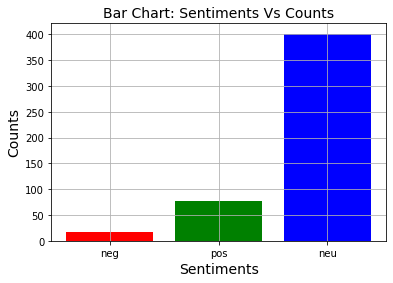

In [ ]:
   
sentiments = list(results.keys())
sentimentCounts = list(results.values())

New_Colors = ['red','green','blue']
plt.bar(sentiments, sentimentCounts, color=New_Colors)
plt.title('Bar Chart: Sentiments Vs Counts', fontsize=14)
plt.xlabel('Sentiments', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.grid(True)
plt.show()

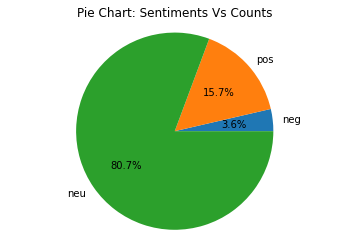

In [ ]:
plt.pie(sentimentCounts,labels=sentiments,autopct='%1.1f%%')
plt.title('Pie Chart: Sentiments Vs Counts')
plt.axis('equal')
plt.show()

# Correlation Analysis/Comparing Sentiment Analysis vs Actual Stock Price
The experiment was carried out on a number of stocks, and the sentiment analysis result was compared to the real stock performance before and after the sentiment analysis. The stock's actual performance did not always match the expectation from the sentiment analysis, although it did at times. This might mean that, while sentiment analysis may have certain qualities that can be utilized to forecast stock direction, we'll need to figure out the most restrictive technique to create the sentiment analysis model. There may also be more aspects to consider, which would need additional study and testing.

#Implication of the study
As previously stated, we do not have adequate data to support the research hypothesis because the correlation analysis shows various findings for the same stock at different times when compared to real stock performance. As a result, the null hypothesis would have to be rejected. However, this experiment has several advantages, such as the use of real-time data, the fact that it takes little time to execute the code and run the experiment, and the fact that it displays bar and pie charts to depict the company's feelings. We can help construct a better directional forecasting experimental model for a stock if we can build a stronger sentiment analysis model and use more factors than simply twitter sentiments.

# Conclusion
Twitter is the most popular social media channel for individuals to voice their favorable and negative comments on everything, including the company. Using API calls, Twitter gives a mechanism to search for and locate Tweets on any topic. The information is likely to be useful in predicting how the company's stock will fare in the short future. I worked on this research to investigate if sentiment analysis of tweets could predict if the stock would perform better in a positive or negative trend depending on whether the tweets were positive or negative. I was able to execute sentiment analysis, but the data showed no consistent association with stock performance. As a result, there isn't enough evidence to support my study hypothesis. However, this does not have to be the end of the project because we can build on the work done in this experiment with further study, a more strict sentiment analysis model, and the usage of more variables. I would be carrrying this research further in future using data from other source of social media as well such as Discord.

# Bibliography



1.   Kouloumpis, E,  et al (2011, Jan). Twitter Sentiment Analysis:The Good the Bad and the OMG!  retrieved from https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.682.5853&rep=rep1&type=pdf
2.   Alsaeedi, A, et al (2019). A Study on Sentiment Analysis Techniques of Twitter Data retrieved from 
https://thesai.org/Downloads/Volume10No2/Paper_48-A_Study_on_Sentiment_Analysis_Techniques.pdf
3.   Igor Mozetič, et al (2016). Multilingual Twitter Sentiment Classification: The Role of Human Annotators retrieved from 
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0155036
4.   Badjatiya, P. et al (2017, Jun 1). Deep Learning for Hate Speech Detection in Tweets retrieved from 
https://arxiv.org/abs/1706.00188
5.   Nabi, J. (2018, Sep 13). Machine Learning – Text Processing retrieved from
https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958






